In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
import pandas as pd

# Load the dataset

In [3]:
df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')

In [4]:
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# Check for missing values

In [7]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(df)) * 100
print(pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percentage}))

              Missing Values  Percentage
CryoSleep                217    2.496261
ShoppingMall             208    2.392730
VIP                      203    2.335212
HomePlanet               201    2.312205
Name                     200    2.300702
Cabin                    199    2.289198
VRDeck                   188    2.162660
FoodCourt                183    2.105142
Spa                      183    2.105142
Destination              182    2.093639
RoomService              181    2.082135
Age                      179    2.059128
PassengerId                0    0.000000
Transported                0    0.000000


In [8]:
unique_values = df.nunique()
print(unique_values)

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64


# Calculate the number of unique columns of categorical features

In [9]:
print(df['HomePlanet'].unique())
print(df['CryoSleep'].unique())
print(df['Cabin'].nunique())
print(df['Destination'].unique())
print(df['Name'].nunique())


['Europa' 'Earth' 'Mars' nan]
[False True nan]
6560
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
8473


# Visualize Data Distributions of Numerical Features

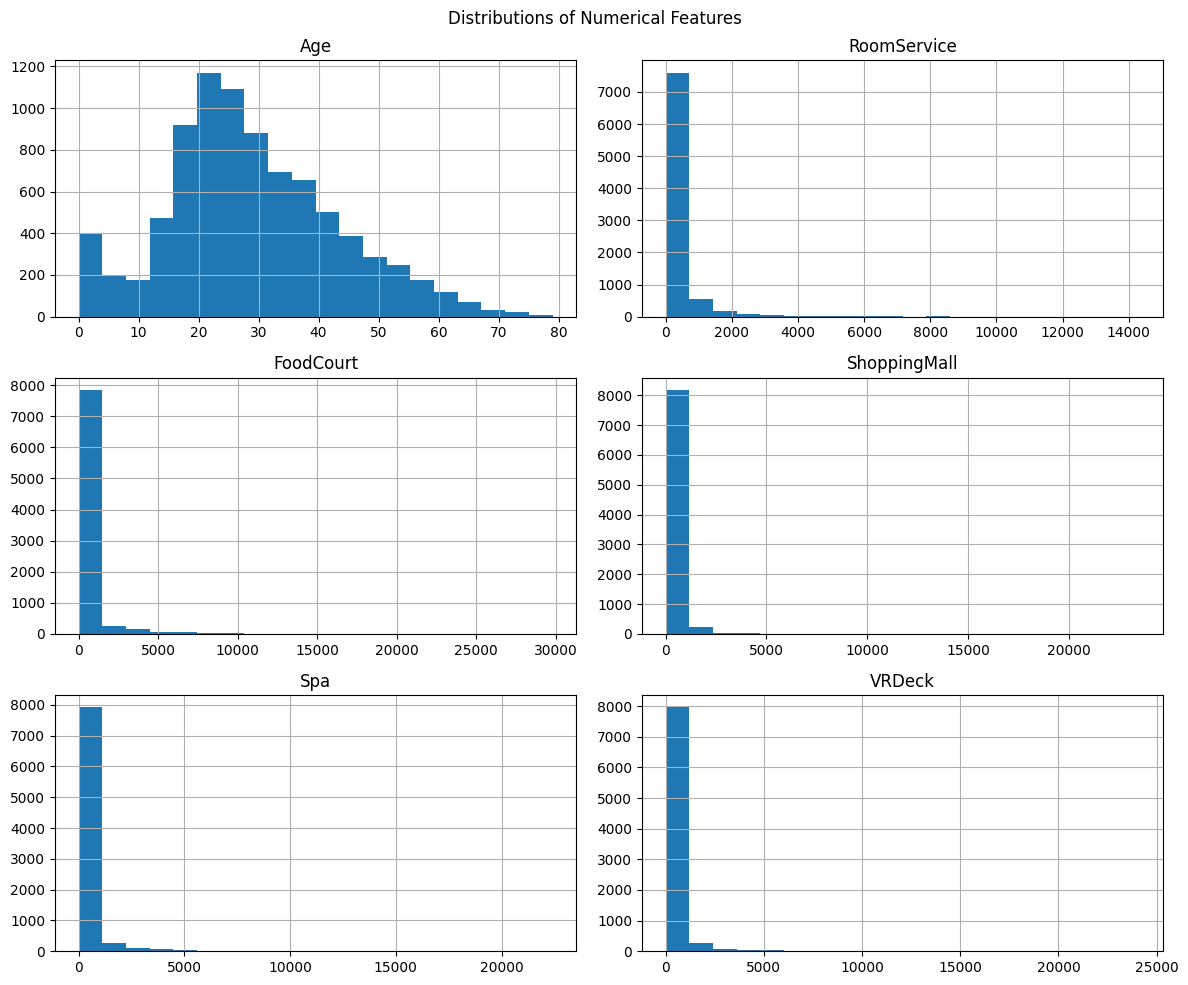

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(bins=20, figsize=(12, 10))
plt.suptitle("Distributions of Numerical Features")
plt.tight_layout()
plt.show()

# Visualize Data Distributions of Categorical Features

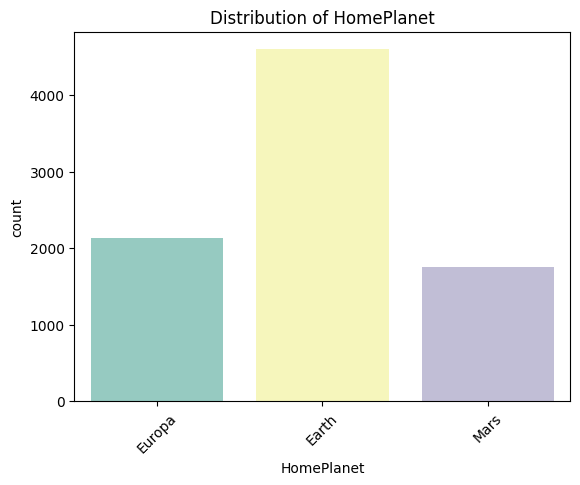

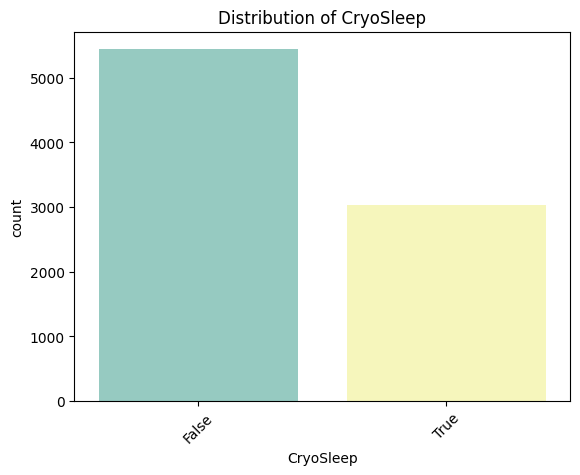

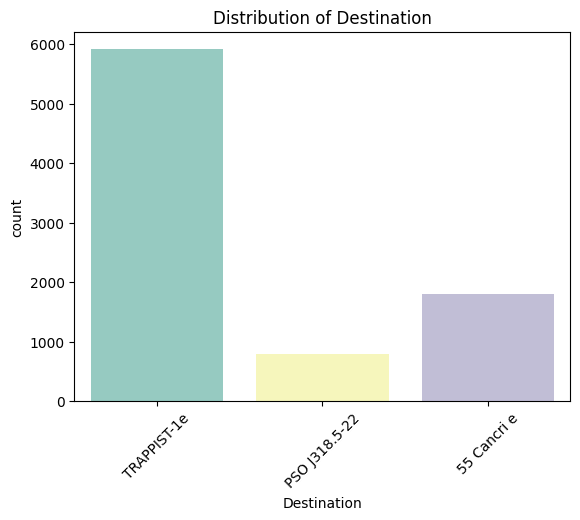

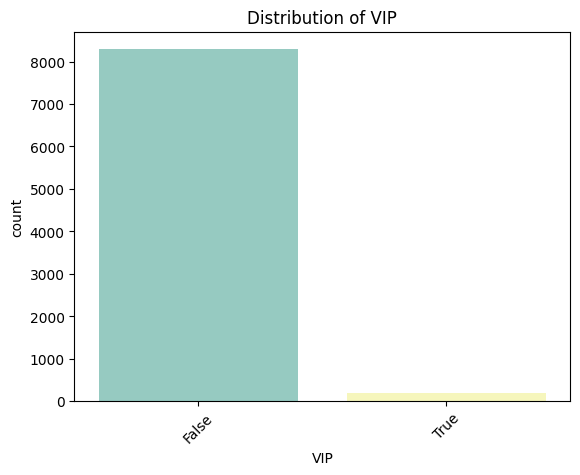

In [11]:
for col in ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']:
    sns.countplot(x=col, data=df, palette="Set3")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

# Correlation Matrix

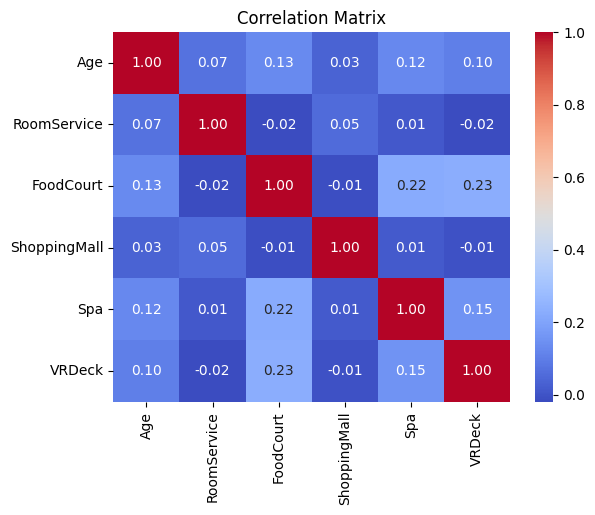

In [12]:
numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Relationship with Target Variable

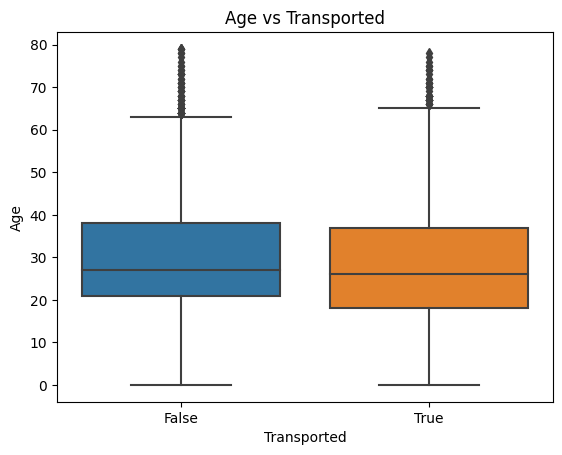

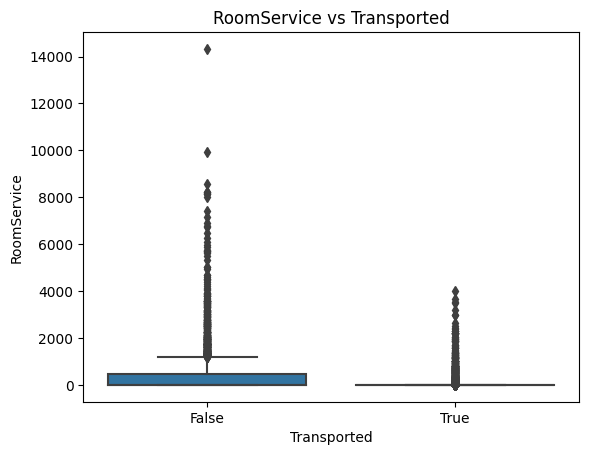

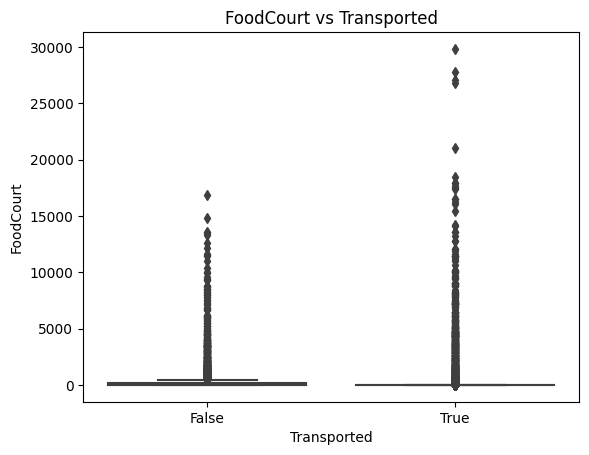

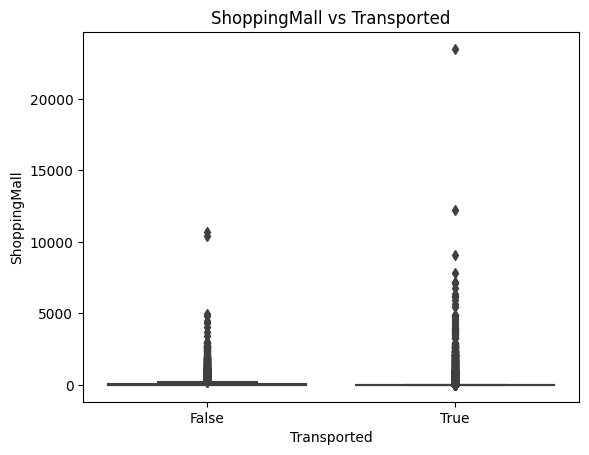

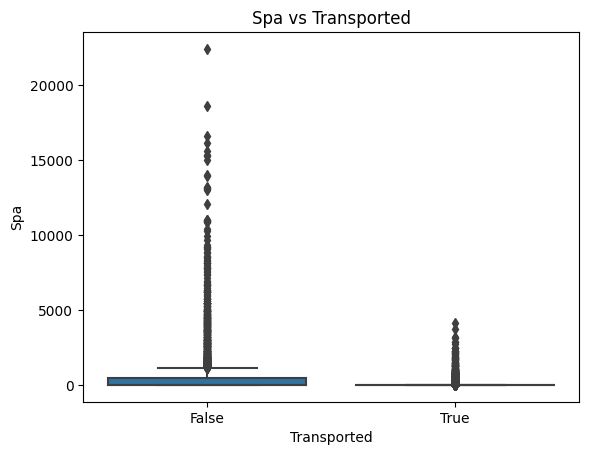

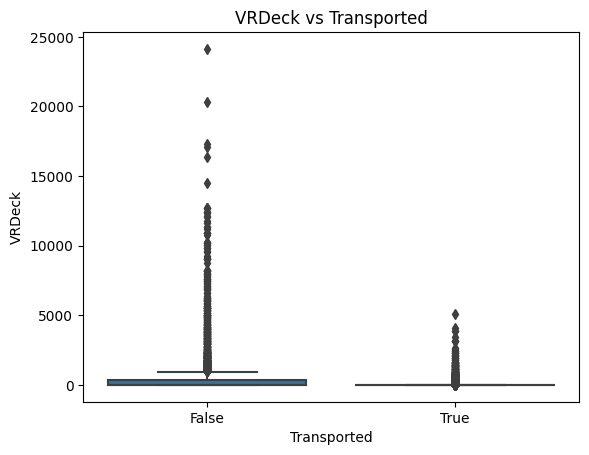

In [13]:
for col in ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    sns.boxplot(x="Transported", y=col, data=df)
    plt.title(f"{col} vs Transported")
    plt.show()

# Explore interactions between features, such as HomePlanet and CryoSleep

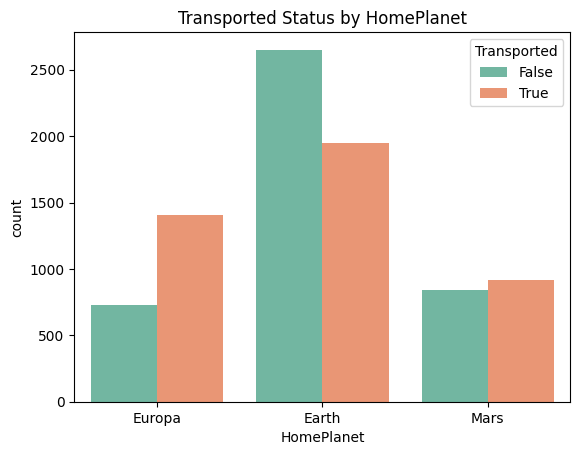

In [14]:
sns.countplot(x="HomePlanet", hue="Transported", data=df, palette="Set2")
plt.title("Transported Status by HomePlanet")
plt.show()

# The Cabin column can be split into Deck, Number, and Side for better analysis.

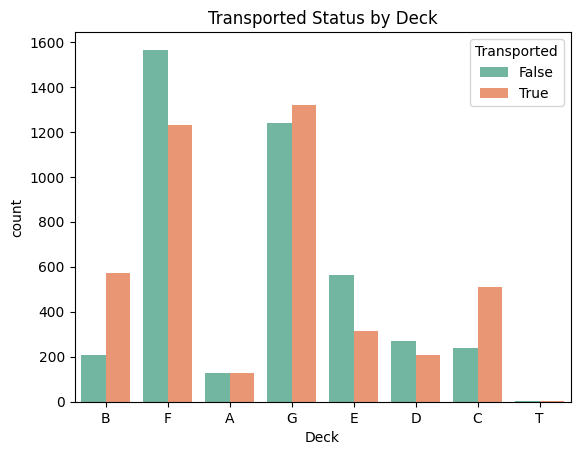

In [15]:
df[['Deck', 'Number', 'Side']] = df['Cabin'].str.split('/', expand=True)

# Visualize Deck distribution
sns.countplot(x="Deck", hue="Transported", data=df, palette="Set2")
plt.title("Transported Status by Deck")
plt.show()

# Analyze features like RoomService, FoodCourt, ShoppingMall, Spa, and VRDeck to identify trends in passenger spending.

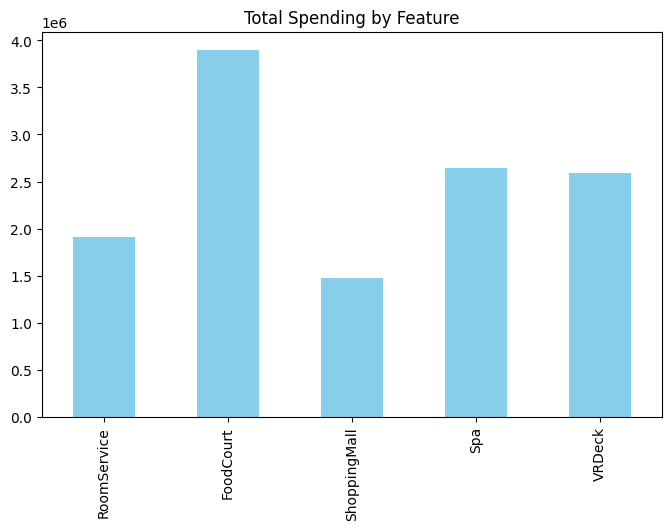

In [16]:
spending_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df[spending_features].sum().plot(kind="bar", figsize=(8, 5), color="skyblue")
plt.title("Total Spending by Feature")
plt.show()

# Analyze CryoSleep and VIP

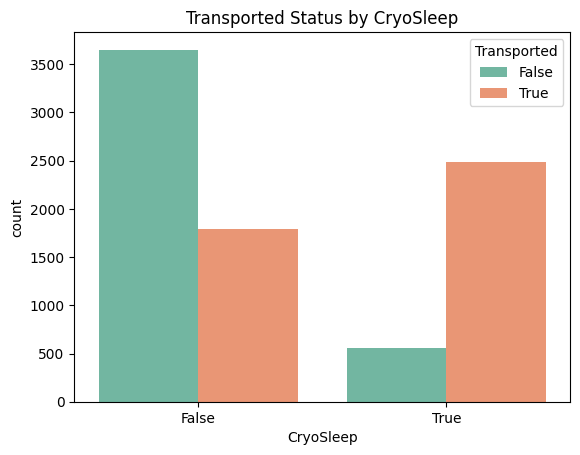

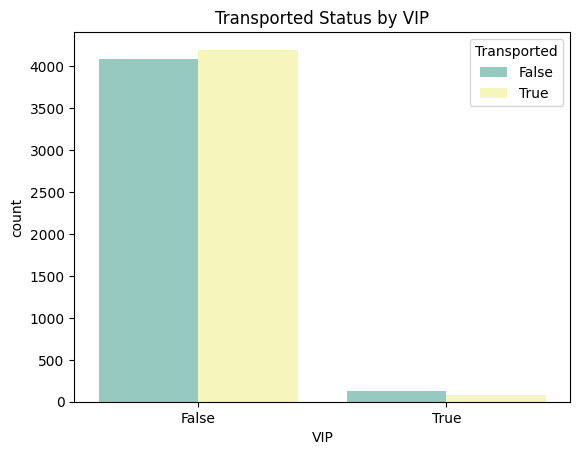

In [17]:
sns.countplot(x="CryoSleep", hue="Transported", data=df, palette="Set2")
plt.title("Transported Status by CryoSleep")
plt.show()

sns.countplot(x="VIP", hue="Transported", data=df, palette="Set3")
plt.title("Transported Status by VIP")
plt.show()


# Visualize the relationship between numerical features with Target Variable

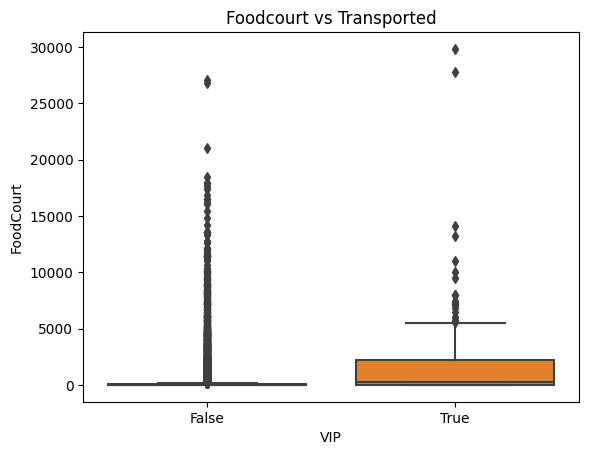

In [18]:
sns.boxplot(x="VIP", y='FoodCourt', data=df)
plt.title(f"Foodcourt vs Transported")
plt.show()

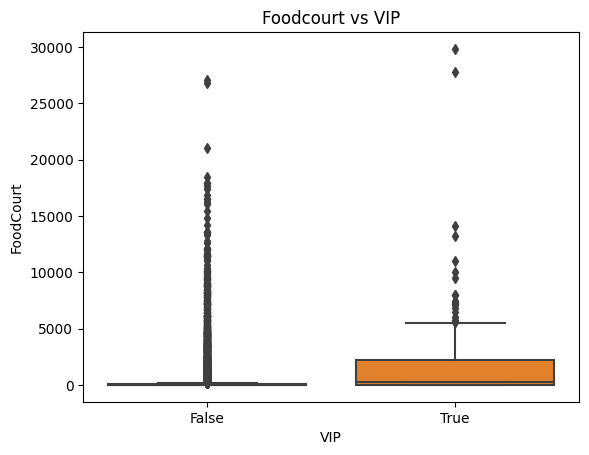

In [19]:
sns.boxplot(x="VIP", y='FoodCourt', data=df)
plt.title(f"Foodcourt vs VIP")
plt.show()

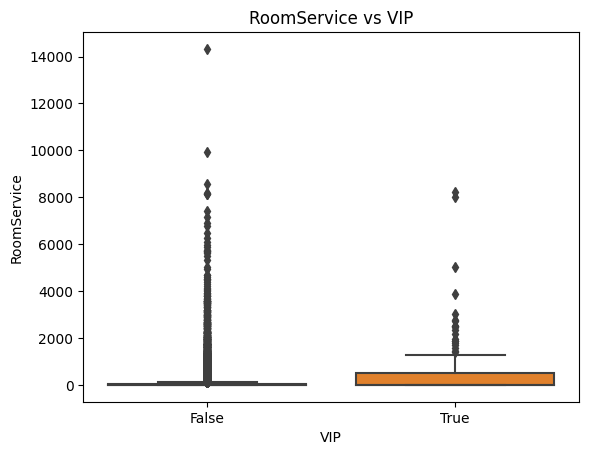

In [20]:
sns.boxplot(x="VIP", y='RoomService', data=df)
plt.title(f"RoomService vs VIP")
plt.show()

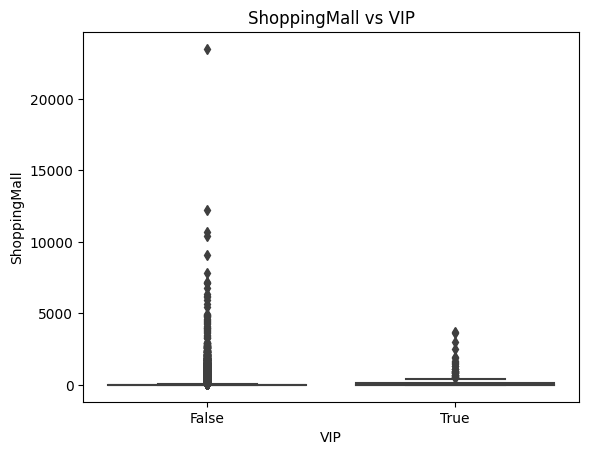

In [21]:
sns.boxplot(x="VIP", y='ShoppingMall', data=df)
plt.title(f"ShoppingMall vs VIP")
plt.show()

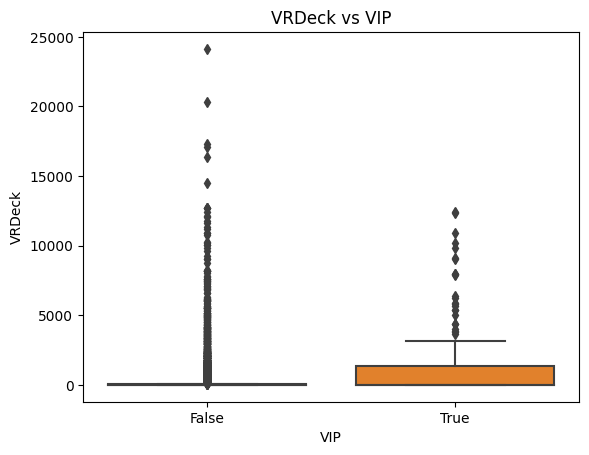

In [22]:
sns.boxplot(x="VIP", y='VRDeck', data=df)
plt.title(f"VRDeck vs VIP")
plt.show()

Cabin and Destination have too many unique values. So I decided to drop these columns

In [23]:
df.drop(columns=['PassengerId', 'Cabin', 'Name'], inplace=True)

# Replace Nan cells with the most common values of their columns. 
Columns that have null values: HomePlanet, CryoSleep, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

In [24]:
mc_homeplanet = df['HomePlanet'].mode()[0]
mc_cryosleep = df['CryoSleep'].mode()[0]
mc_destination = df['Destination'].mode()[0]
mean_age = df['Age'].mean()
mc_vip = df['VIP'].mode()[0]
mean_roomservice = df['RoomService'].mean()
mean_foodcourt = df['FoodCourt'].mean()
mean_shoppingmall = df['ShoppingMall'].mean()
mean_spa = df['Spa'].mean()
mean_vrdeck = df['VRDeck'].mean()
df.fillna(value={"HomePlanet": mc_homeplanet, "CryoSleep": mc_cryosleep, "Destination": mc_destination, 
                 'Age': mean_age, 'VIP': mc_vip, 'RoomService': 0, 
                 'FoodCourt': 0, 'ShoppingMall': 0,
                'Spa': 0, 'VRDeck': 0}, inplace=True)

/tmp/ipykernel_30/3079240546.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(value={"HomePlanet": mc_homeplanet, "CryoSleep": mc_cryosleep, "Destination": mc_destination,


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Deck          8494 non-null   object 
 12  Number        8494 non-null   object 
 13  Side          8494 non-null   object 
dtypes: bool(3), float64(6), object(5)
memory usage: 772.6+ KB


In [26]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Number,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


# Apply one-hot coding to HomePlanet and Destination

In [27]:
df = pd.get_dummies(df, columns = ['HomePlanet', 'Destination', 'Deck', 'Side'], drop_first=True)
df = df.dropna()
df = df.astype(int)

# Visualize the distribution of data types

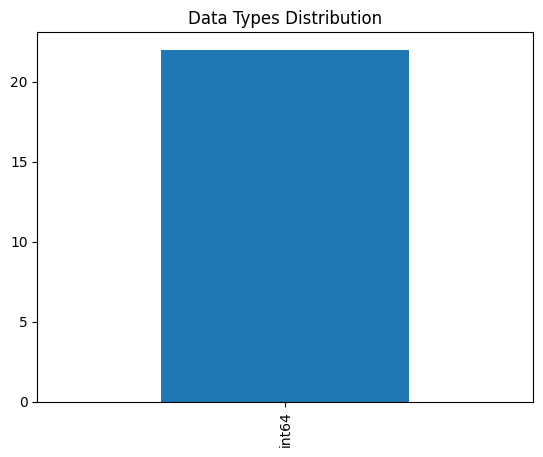

In [28]:
df.dtypes.value_counts().plot(kind='bar', title='Data Types Distribution')
plt.show()

# Check target variable balance

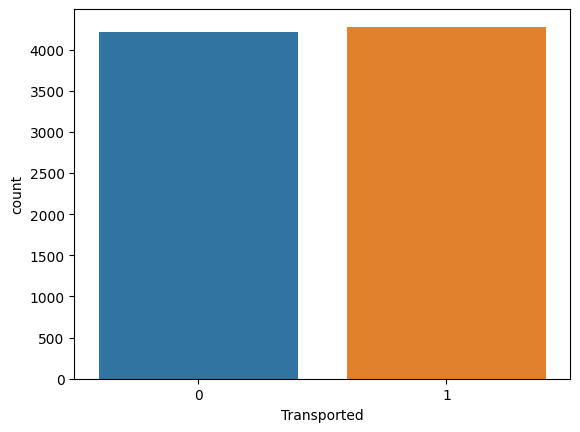

In [29]:
sns.countplot(data=df, x='Transported')
plt.show()

In [32]:
df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Number,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
0,0,39,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,0,24,0,109,9,25,549,44,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,58,1,43,3576,0,6715,49,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,33,0,0,1283,371,3329,193,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,16,0,303,70,151,565,2,1,1,...,0,1,0,0,0,0,1,0,0,1


In [33]:
y = df['Transported']
X = df.drop(columns=['Transported'])

# Normalize all the features to range [0, 1]

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_train[0:5]

array([[0.00000000e+00, 4.17721519e-01, 0.00000000e+00, 4.73790323e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.76066104e-01,
        7.42872228e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 4.55696203e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.94508976e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 6.58227848e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.04857445e-01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.0000